Pre Process

In [33]:
from pandas import *
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [34]:
data1 = read_excel("C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/data1.xlsx")
data2 = read_csv("C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/data2.csv")

In [35]:
data1['Trading Month'] = to_datetime(data1['Trading Month'])
data2 = data2[data2['Code for Statement Type'] == 'A']
data2.sort_values(by=[' Stock Code', 'Ending Date of Fiscal Year'], ascending=True, inplace=True)
data2['Ending Date of Fiscal Year'] = to_datetime(data2['Ending Date of Fiscal Year'])

In [36]:
def get_statistics_date(trdmnt):
    if trdmnt.month in [1, 2, 3]:
        return to_datetime(f"{trdmnt.year - 1}-12-31")
    elif trdmnt.month in [4, 5, 6]:
        return to_datetime(f"{trdmnt.year}-03-31")
    elif trdmnt.month in [7, 8, 9]:
        return to_datetime(f"{trdmnt.year}-06-30")
    elif trdmnt.month in [10, 11, 12]:
        return to_datetime(f"{trdmnt.year}-09-30")
    else:
        return NaT
data1['Statistics Date'] = data1['Trading Month'].apply(get_statistics_date)

In [37]:
data1['Statistics Date'] = to_datetime(data1['Statistics Date'])
data1 = data1.merge(data2, left_on=['Stock Code', 'Statistics Date'], right_on=[' Stock Code', 'Ending Date of Fiscal Year'], how='left')

In [38]:
data1['P/B'] = data1['Monthly Closing Price'] / data1['Net Assets per Share']

In [39]:
data1['year'] = data1['Trading Month'].dt.year
data1 = data1[(data1['year'] >= 2010) & (data1['year'] <= 2023)]
_5percentile = data1['P/B'].quantile(0.05)
_95percentile = data1['P/B'].quantile(0.95)
data1 = data1[(data1['P/B'] >= _5percentile) & (data1['P/B'] <= _95percentile)]

In [40]:
data1.to_csv("C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/FIN3080_P2/data1_revised.csv", index=False)
data2.to_csv("C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/FIN3080_P2/data2.revised.csv", index=False)

In [41]:
data1.drop(columns=['Return on Equity', 'Stock Short Name'], inplace=True)

In [42]:
data2_clean = data2[[' Stock Code', 'Ending Date of Fiscal Year', 'Return on Equity']]

In [43]:
time = data1[data1['Trading Month'].dt.year == 2010]
data_2010 = time[time['Trading Month'].dt.month == 12]
data_2010['Trading Month'] = data_2010['Trading Month'].replace(Timestamp('2010-12-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))

C:\Users\Charles Lee\AppData\Local\Temp\ipykernel_1988\3438520889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['Trading Month'] = data_2010['Trading Month'].replace(Timestamp('2010-12-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))


In [44]:
data_2010 = data_2010.merge(data2, left_on=['Stock Code', 'Trading Month'], right_on=[' Stock Code', 'Ending Date of Fiscal Year'], how='left')

In [45]:
data3 = read_csv('C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/FIN3080_P2/data3.csv')
data3['Trading Date'] = to_datetime(data3['Trading Date'])
data_2010 = data_2010.merge(data3, left_on=['Stock Code', 'Trading Month'], right_on=['Stock Code', 'Trading Date'], how='left')

In [46]:
data_2010

,Stock Code,Trading Month,Monthly Closing Price,Monthly Return,Statistics Date,Stock Code_x,Ending Date of Fiscal Year_x,Code for Statement Type_x,Net Assets per Share_x,P/B,year,Stock Code_y,Stock Short Name,Ending Date of Fiscal Year_y,Code for Statement Type_y,Return on Equity,Net Assets per Share_y,Trading Date,Volatility
0,1,2010-12-31,15.79,-0.036608,2010-09-30,1.0,2010-09-30,A,9.223531,1.711926,2010,1.0,SFZA,2010-12-31,A,0.234177,9.525797,2010-12-31,0.375077
1,2,2010-12-31,8.22,0.011070,2010-09-30,2.0,2010-09-30,A,4.487111,1.831914,2010,2.0,WKA,2010-12-31,A,0.176802,4.964544,2010-12-31,0.360978
2,4,2010-12-31,12.04,-0.063764,2010-09-30,4.0,2010-09-30,A,1.505125,7.999336,2010,4.0,ST GN,2010-12-31,A,0.184460,1.538716,2010-12-31,0.382118
3,5,2010-12-31,3.67,-0.046753,2010-09-30,5.0,2010-09-30,A,0.738516,4.969425,2010,5.0,SJXY,2010-12-31,A,-0.006426,0.738587,2010-12-31,0.409691
4,6,2010-12-31,6.97,0.013081,2010-09-30,6.0,2010-09-30,A,2.860425,2.436701,2010,6.0,SZYA,2010-12-31,A,0.209026,3.362780,2010-12-31,0.502408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,601988,2010-12-31,3.23,-0.012232,2010-09-30,601988.0,2010-09-30,A,2.355607,1.371196,2010,601988.0,ZGYH,2010-12-31,A,0.179594,2.422200,2010-12-31,0.201127
1727,601989,2010-12-31,11.79,0.090657,2010-09-30,601989.0,2010-09-30,A,3.335659,3.534534,2010,601989.0,ZGZG,2010-12-31,A,0.073909,3.471708,NaT,NaN
1728,601991,2010-12-31,6.09,-0.077273,2010-09-30,601991.0,2010-09-30,A,3.004893,2.026694,2010,601991.0,DTFD,2010-12-31,A,0.105288,3.112990,2010-12-31,0.285140
1729,601998,2010-12-31,5.25,-0.033149,2010-09-30,601998.0,2010-09-30,A,3.100966,1.693021,2010,601998.0,ZXYH,2010-12-31,A,0.188118,3.190582,2010-12-31,0.357737


In [47]:
print(data_2010.isnull().sum())  

Stock Code                        0
Trading Month                     0
Monthly Closing Price             0
Monthly Return                   10
Statistics Date                   0
 Stock Code_x                     0
Ending Date of Fiscal Year_x      0
Code for Statement Type_x         0
Net Assets per Share_x            0
P/B                               0
year                              0
 Stock Code_y                     1
Stock Short Name                  1
Ending Date of Fiscal Year_y      1
Code for Statement Type_y         1
Return on Equity                  2
Net Assets per Share_y            1
Trading Date                    342
Volatility                      342
dtype: int64


In [48]:
data_2010 = data_2010.dropna()
regression_data = data_2010[['P/B', 'Return on Equity', 'Volatility']]
X = regression_data[['Return on Equity', 'Volatility']]
y = regression_data['P/B']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    P/B   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.54e-43
Time:                        15:56:26   Log-Likelihood:                -2885.7
No. Observations:                1388   AIC:                             5777.
Df Residuals:                    1385   BIC:                             5793.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1420      0.289  

Question 2

In [49]:
data = read_csv("C:/Users/Charles Lee/OneDrive - CUHK-Shenzhen/FIN3080_P2/data1_revised.csv")
data['Trading Month'] = to_datetime(data['Trading Month'])
lists = [[] for i in range(1, 11)]
data = data[['Stock Code', 'Trading Month', 'Monthly Return', 'P/B']]

In [50]:
data['lagged P/B'] = data.groupby('Stock Code')['P/B'].shift(1)
data.dropna(subset='lagged P/B', inplace=True)

In [51]:
data

,Stock Code,Trading Month,Monthly Return,P/B,lagged P/B
1,1,2010-02-01,0.034562,3.405878,3.292096
2,1,2010-03-01,0.033408,3.519660,3.405878
3,1,2010-04-01,-0.113793,2.887753,3.519660
4,1,2010-05-01,-0.148346,2.459366,2.887753
5,1,2010-06-01,0.000000,2.459366,2.459366
...,...,...,...,...,...
486070,873665,2023-11-01,0.567663,1.762270,1.124139
486071,873665,2023-12-01,0.367713,2.410280,1.762270
486073,873693,2023-12-01,-0.168535,9.425669,7.839598
486076,873726,2023-11-01,0.337156,6.366081,4.760912


In [52]:
grouped_data = data.groupby('Trading Month')
data['decile'] = grouped_data['lagged P/B'].transform(lambda x: qcut(x, 10, labels=[1,2,3,4,5,6,7,8,9,10]))
data

,Stock Code,Trading Month,Monthly Return,P/B,lagged P/B,decile
1,1,2010-02-01,0.034562,3.405878,3.292096,4
2,1,2010-03-01,0.033408,3.519660,3.405878,4
3,1,2010-04-01,-0.113793,2.887753,3.519660,4
4,1,2010-05-01,-0.148346,2.459366,2.887753,3
5,1,2010-06-01,0.000000,2.459366,2.459366,3
...,...,...,...,...,...,...
486070,873665,2023-11-01,0.567663,1.762270,1.124139,1
486071,873665,2023-12-01,0.367713,2.410280,1.762270,3
486073,873693,2023-12-01,-0.168535,9.425669,7.839598,10
486076,873726,2023-11-01,0.337156,6.366081,4.760912,9


In [53]:
def append_into_lists(month):
    for i in range(1, 11):
        data_using = data[data['Trading Month'] == month]       
        num = data_using[data_using['decile'] == i].shape[0]
        sum_of_return = data_using[data_using['decile'] == i]['Monthly Return'].sum()
        lists[i - 1].append(sum_of_return / num)
for month, group in grouped_data:
    append_into_lists(month)

In [54]:
print(len(lists))

10


In [55]:
aver_list =[]
for i in lists:
    aver_list.append(sum(i) / len(i))
print(aver_list)

[0.01808963411686887, 0.014043542424978914, 0.013443959573282385, 0.012766481979191675, 0.011776720581388745, 0.011893932308491327, 0.010429319657233786, 0.008368541828451969, 0.0054587918451928785, -0.013849787160399493]


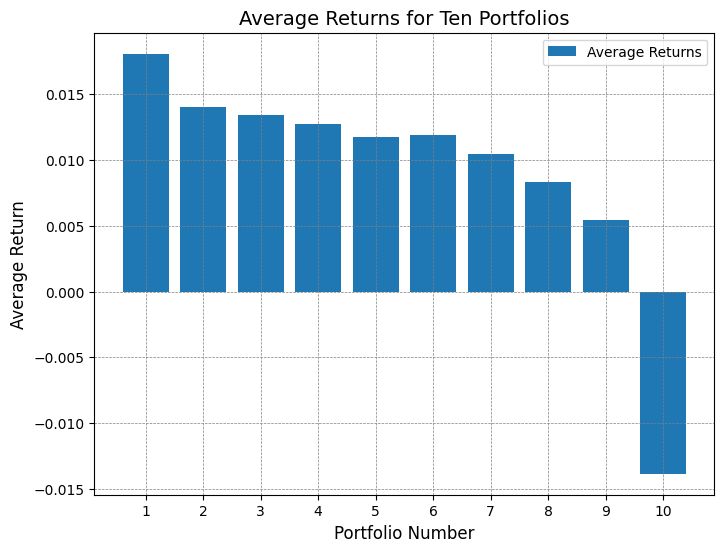

In [56]:
portfolio = list(range(1,11))

plt.figure(figsize=(8, 6))
plt.bar(portfolio, aver_list)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(['Average Returns'], loc='upper right')
plt.xlabel('Portfolio Number', fontsize=12)
plt.ylabel('Average Return', fontsize=12)
plt.title('Average Returns for Ten Portfolios', fontsize=14)
plt.xticks(range(1, 11))  
plt.yticks(fontsize=10)
plt.show()